In [27]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/heart_disease_data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
df.shape

(303, 14)

In [29]:
# from sklearn.svm import LinearSVC
# from sklearn.model_selection import train_test_split
# np.random.seed(4)
# X = df.drop('target',axis=1)
# Y = df['target']
# X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
# clf = LinearSVC(max_iter=1000)
# clf.fit(X_train,Y_train)
# clf.score(X_test,Y_test)

In [30]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [31]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(4)
X = df.drop('target',axis=1)
Y = df['target']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
clf = RandomForestClassifier(n_estimators = 10)
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

0.8032786885245902

1. If you have structured data, used ensemble methods
<br>
2. If you have unstructured data, use deep learning or transfer learning

Two ways to make predicions : 

1. `predict()`<br>
2. `predict_proba()`

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
y_preds = clf.predict(X_test)
np.mean(y_preds==Y_test)

0.8032786885245902

In [34]:
acc_score = accuracy_score(Y_test,y_preds)

In [35]:
print(acc_score)

0.8032786885245902


In [36]:
#Make predictions with predict_proba()
clf.predict_proba(X_test[:5])

array([[0.5, 0.5],
       [0.6, 0.4],
       [0.3, 0.7],
       [0. , 1. ],
       [0.6, 0.4]])

In [37]:
clf.predict(X_test[:5])

array([0, 0, 1, 1, 0])

#Classification Model Evaluation

In [38]:
# 1. Accuracy
# 2. Area under ROC curve
# 3. Confusion matrix
# 4. Classification report

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = df.drop("target",axis=1)
Y  = df['target']

clf= RandomForestClassifier()
cross_val_score = cross_val_score(clf,X,Y,cv = 5)

In [40]:
np.mean(cross_val_score)

0.8248087431693989

#Area under receiver operating charactersitc curve (AUC/ROC

 Comparison of model's True Positive rate and model's False positive rate
 <br>
 TPR = model predicts 1 when truth is 1<br>
 FNR = model predicts 1 when truth is 0<br>
TNR = model predicts 0 when truth is 0<br>
FNR = model predicts 0 when truth is 1

In [41]:
# Comparison of model's True Positive rate and model's False positive rate

In [42]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)
clf.fit(X_train,Y_train)
from sklearn.metrics import roc_curve
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.16, 0.84],
       [0.42, 0.58],
       [0.34, 0.66],
       [0.06, 0.94],
       [0.69, 0.31],
       [0.86, 0.14],
       [0.22, 0.78],
       [0.28, 0.72],
       [0.9 , 0.1 ],
       [0.48, 0.52]])

In [43]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]


array([0.84, 0.58, 0.66, 0.94, 0.31, 0.14, 0.78, 0.72, 0.1 , 0.52])

In [44]:
fpr,tpr,thresholds = roc_curve(Y_test,y_probs_positive)


In [45]:
fpr

array([0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.03125,
       0.03125, 0.03125, 0.03125, 0.0625 , 0.09375, 0.09375, 0.09375,
       0.125  , 0.125  , 0.125  , 0.1875 , 0.1875 , 0.1875 , 0.4375 ,
       0.5    , 0.59375, 0.65625, 0.75   , 0.78125, 0.90625, 1.     ])

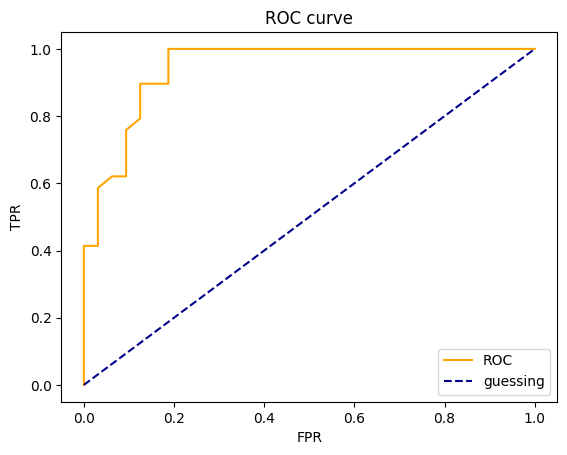

In [46]:
import matplotlib.pyplot as plt
def plt_roc_curve(fpr,tpr):
  #  """Plots a ROC curve given fpr and tpr of model"""
   plt.plot(fpr,tpr,color='orange',label = "ROC")
   plt.plot([0,1],color = 'darkblue',linestyle = "--",label="guessing")
   plt.xlabel('FPR')
   plt.ylabel('TPR')
   plt.title('ROC curve')
   plt.legend()
   plt.show()

plt_roc_curve(fpr,tpr)
 

In [47]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,y_probs_positive)

0.9439655172413793

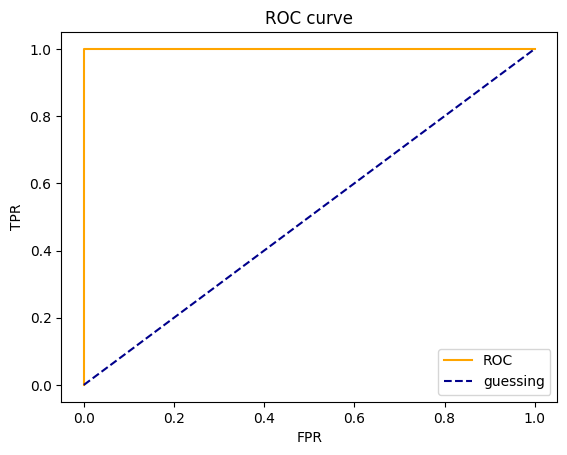

In [49]:
fpr,tpr,thresholds = roc_curve(Y_test,Y_test)
plt_roc_curve(fpr,tpr)
#perfect auc score -> 1.0

#Confusion Matrix

In [50]:
#quick way to compare the labels a model predicts and the actual labels it was supposed to predict

In [52]:
#It gives you the idea of where the model is getting confused

In [53]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
confusion_matrix(Y_test,y_preds)

array([[26,  6],
       [ 0, 29]])

In [54]:
pd.crosstab(Y_test,y_preds,rownames = ["Actual Label"],colnames = ['Predictede Labels'])

Predictede Labels,0,1
Actual Label,,
0,26,6
1,0,29


In [56]:
#make our confusion matrix more visual using seaborn heatmap

<Axes: >

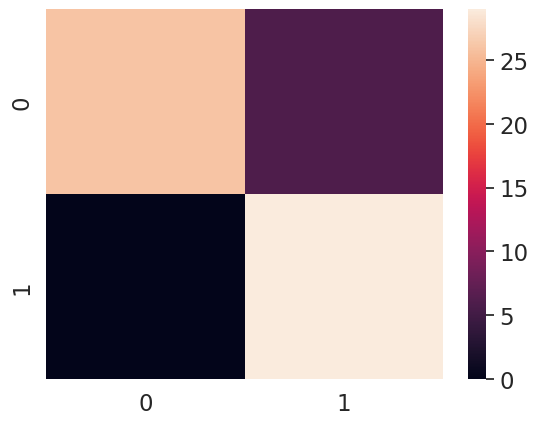

In [57]:
import seaborn as sns
sns.set(font_scale = 1.5)
conf_mat = confusion_matrix(Y_test,y_preds)
sns.heatmap(conf_mat)

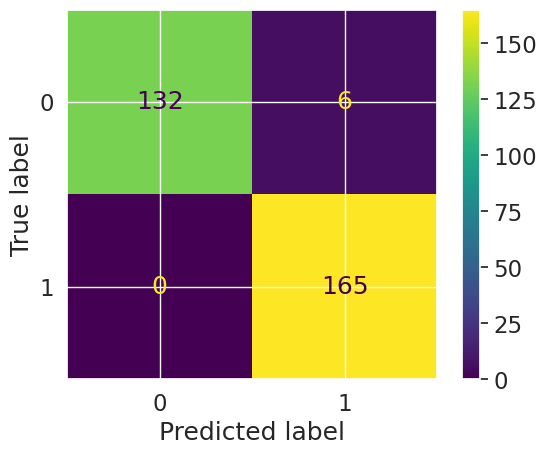

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator = clf,X=X,y=Y)

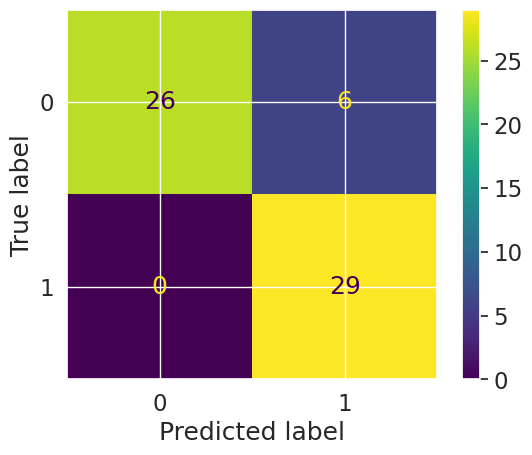

In [63]:
ConfusionMatrixDisplay.from_predictions(y_true = Y_test,y_pred = y_preds)

#Classification Report

In [64]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      0.81      0.90        32
           1       0.83      1.00      0.91        29

    accuracy                           0.90        61
   macro avg       0.91      0.91      0.90        61
weighted avg       0.92      0.90      0.90        61

